#### Task 1

In [1]:
import numpy as np
import cv2 as cv
img = cv.imread('img1.jpg')

In [2]:
hist_blue = cv.calcHist([img],[0],None,[256],[0,256]) #[0] for blue channel
hist_green = cv.calcHist([img],[1],None,[256],[0,256]) #[0] for green channel
hist_red = cv.calcHist([img],[2],None,[256],[0,256]) #[0] for red channel

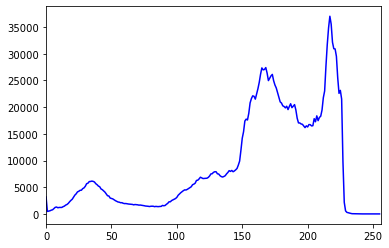

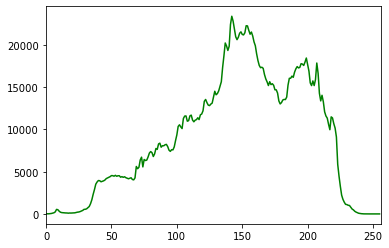

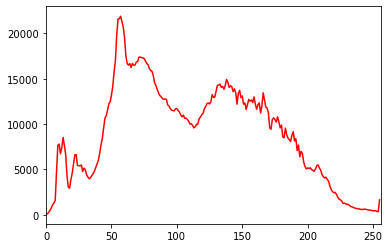

In [3]:
from matplotlib import pyplot as plt
plt.plot(hist_blue, color = 'b')
plt.xlim([0,256])
plt.show()
plt.plot(hist_green, color = 'g')
plt.xlim([0,256])
plt.show()
plt.plot(hist_red, color = 'r')
plt.xlim([0,256])
plt.show()

In [4]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

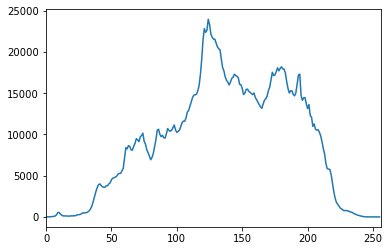

In [5]:
hist_gray = cv.calcHist([img_gray],[0],None,[256],[0,256])
plt.plot(hist_gray)
plt.xlim([0,256])
plt.show()

In [6]:
def getCumulativeDis(hist):
    c = [] #cumulative distribution
    s = 0
    for i in range(0, len(hist)):
        s = s + hist[i]
        c.append(s)
    return c

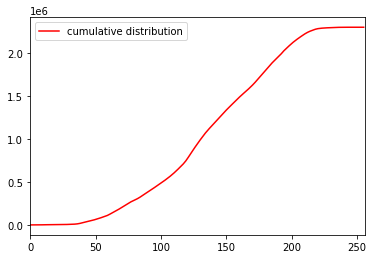

In [7]:
c = getCumulativeDis(hist_gray)
plt.plot(c, label = 'cumulative distribution', color = 'r')
plt.legend(loc="upper left")
plt.xlim([0,256])
plt.show()

#### Task 2

In [8]:
img_equ = cv.equalizeHist(img_gray)

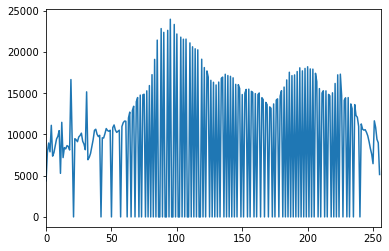

In [9]:
hist_equ = cv.calcHist([img_equ],[0],None,[256],[0,256])
plt.plot(hist_equ)
plt.xlim([0,256])
plt.show()

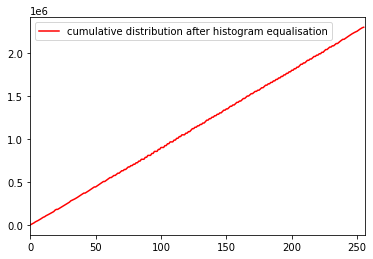

In [10]:
c_equ = getCumulativeDis(hist_equ)
plt.plot(c_equ, label = 'cumulative distribution after histogram equalisation', color = 'r')
plt.legend(loc="upper left")
plt.xlim([0,256])
plt.show()

In [11]:
img_equalisation = np.hstack((img_gray, img_equ)) #stacking images side-by-side
cv.imwrite('img_equalisation.png', img_equalisation) #writing the stacked image to file

True

#### Task 3: Comparing images via their histograms

In [12]:
import math
def NormaliseHist(hist):
    s = 0
    hist_norm = hist.copy()
    for i in range(0, len(hist_norm)):
        s = s + hist_norm[i]
    for i in range(0, len(hist_norm)):
        hist_norm[i] = hist_norm[i] / s
    return hist_norm    

In [13]:
###Assuming both hist to be of same dims, if not then do padding
def X2Dist(h1,h2):
    x2_dist = 0
    for i in range (0, len(h1)):
        #to prevent divide by zero error
        if h1[i] == 0:
            h1[i] = 0.000001
        if h2[i] == 0:
            h2[i] = 0.000001
        x2_dist += ((h1[i] - h2[i]) * (h1[i] - h2[i])) / (h1[i] + h2[i])
    return x2_dist

In [14]:
###Assuming both hist to be of same dims, if not then do padding
def KLDivergence(h1,h2):
    kld = 0
    for i in range(0, len(h1)):
        #to prevent divide by zero error
        if h1[i] == 0:
            h1[i] = 0.000001
        if h2[i] == 0:
            h2[i] = 0.000001
        kld += h1[i] * math.log(h1[i]/h2[i])
    return kld   

In [15]:
img1 = cv.imread("img1.jpg")
img2 = cv.imread("img2.jpg")
img3 = cv.imread("img3.jpg")

In [16]:
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img3_gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

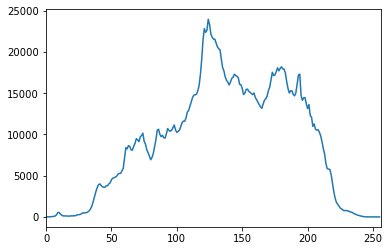

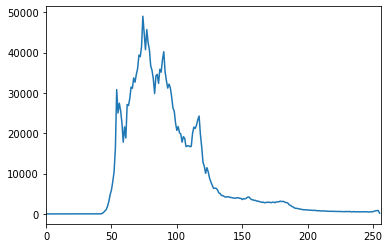

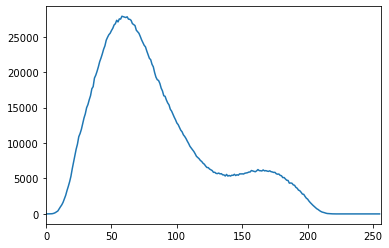

In [17]:
hist_gray1 = cv.calcHist([img1_gray],[0],None,[256],[0,256])
plt.plot(hist_gray1)
plt.xlim([0,256])
plt.show()
hist_gray2 = cv.calcHist([img2_gray],[0],None,[256],[0,256])
plt.plot(hist_gray2)
plt.xlim([0,256])
plt.show()
hist_gray3 = cv.calcHist([img3_gray],[0],None,[256],[0,256])
plt.plot(hist_gray3)
plt.xlim([0,256])
plt.show()

In [18]:
kld1_2 = KLDivergence(NormaliseHist(hist_gray1), NormaliseHist(hist_gray2))
kld2_1 = KLDivergence(NormaliseHist(hist_gray2), NormaliseHist(hist_gray1))

kld1_3 = KLDivergence(NormaliseHist(hist_gray1), NormaliseHist(hist_gray3))
kld3_1 = KLDivergence(NormaliseHist(hist_gray3), NormaliseHist(hist_gray1))

kld2_3 = KLDivergence(NormaliseHist(hist_gray2), NormaliseHist(hist_gray3))
kld3_2 = KLDivergence(NormaliseHist(hist_gray3), NormaliseHist(hist_gray2))

#Summin up both the KLDivergence values to get similiarity measure
kld1_2_1 = kld1_2 + kld2_1
kld1_3_1 = kld1_3 + kld3_1
kld2_3_2 = kld2_3 + kld3_2

print (kld1_2, kld1_3, kld2_3)
print (kld2_1, kld3_1, kld3_2)
print ("Final KL Divergence: ", kld1_2_1, kld1_3_1, kld2_3_2)

[0.9527246] [0.8078311] [0.40676308]
[0.78114796] [0.8567822] [1.5019116]
Final KL Divergence:  [1.7338725] [1.6646132] [1.9086747]


In [19]:
x2d1_2 = X2Dist(hist_gray1, hist_gray2)
x2d1_3 = X2Dist(hist_gray1, hist_gray3)
x2d2_3 = X2Dist(hist_gray2, hist_gray3)
print(x2d1_2, x2d1_3, x2d2_3)

[1567300.] [1434813.1] [837586.75]


In [20]:
x2d1_2_norm = X2Dist(NormaliseHist(hist_gray1), NormaliseHist(hist_gray2))
x2d1_3_norm = X2Dist(NormaliseHist(hist_gray1), NormaliseHist(hist_gray3))
x2d2_3_norm = X2Dist(NormaliseHist(hist_gray2), NormaliseHist(hist_gray3))
print(x2d1_2_norm, x2d1_3_norm, x2d2_3_norm)

[0.6802513] [0.62274855] [0.3635359]
